In [12]:
import tensorflow as tf



In [13]:
# Import the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('.',one_hot=True)

print(mnist)
print("---------------------------------------")
print("  training set: ", mnist.train.images.shape)
print("validation set: ", mnist.validation.images.shape)
print("      test set: ", mnist.test.images.shape)




Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002D9D2F2A8D0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002D9D2F2ACF8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000002D9D2AC1C88>)
---------------------------------------
  training set:  (55000, 784)
validation set:  (5000, 784)
      test set:  (10000, 784)


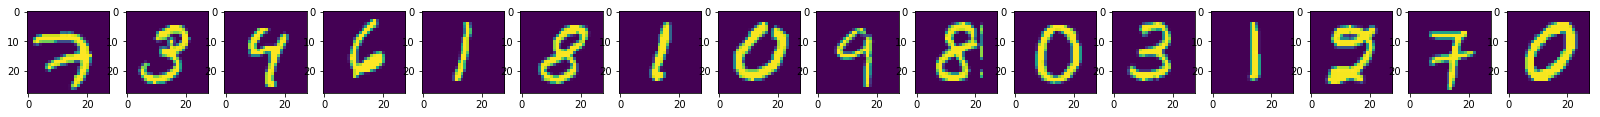

In [14]:
# Visualize some of the training samples
%matplotlib inline
import matplotlib.pyplot as plot
fig = plot.figure(figsize=(28,28)) 
plot.axis('off')
count = 16
for i in range(count):
    fig.add_subplot(plot.subplot(2,count,i+1))
    plot.imshow(mnist.train.images[i].reshape(28,28))
plot.show()


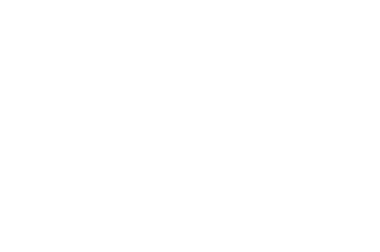

In [15]:
from IPython.display import clear_output
import time
plot.axis('off')

def show_image(plot, ndarray_of_pixels, size=(28,28), cmap='viridis'):
    plot.imshow(ndarray_of_pixels.reshape(*size), cmap=cmap)
    time.sleep(0.2)
    clear_output(True)
    plot.show()


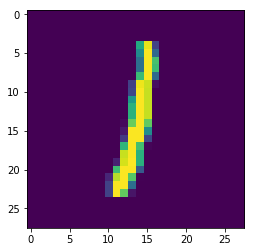

In [16]:
# Let's preview some of the training data
count = 5
for i in range(count):
    show_image(plot, mnist.train.images[i])
plot.close()

In [160]:
import matplotlib

def resetWeightsAndBias():
    # samples_x will hold our training samples
    samples_x  = tf.placeholder(tf.float32, [None, 784], name='samples')

    # labels_y holds the one_hot labels of the handwritten digits in an array
    labels_y  = tf.placeholder(tf.float32, [None, 10], name='labels')

    # Our model will contain 10 separate interal 'ideas' or 'representations' of what 
    # each digit looks like.  These 'ideas' are represented by 784 weights that are applied 
    # to each input pixel to later score how closely a new handwritten digit compares 
    # with the 'ideal' digit it has learned.  Our model also includes another form of weight called 
    # a 'bias' that will adjust the weighted value by a constant amount, regardless of the input.

    # Both the weights and the biases are learned values that will be learned when the model 
    # is trained againstthe training set.

    weights_w = tf.Variable(tf.random_normal([784, 10], stddev=100), name="weights")
    biases_b  = tf.Variable(tf.zeros([10]), name="biases")

    # Our model is linear y = x*W + b
    # It has 10 cells, representing the 10 output neurons
    # The output is formed by
    model_y   = tf.matmul(samples_x, weights_w) + biases_b


def visualize(images, cmap='viridis'):
    trainedWeights = []
    for i in range(10):
        trainedWeights.append(images[i,:,:])
        plot.subplot(2,5,i+1)
        plot.axis('off')
        plot.imshow(trainedWeights[i], cmap=cmap, interpolation='none')
    


Training complete


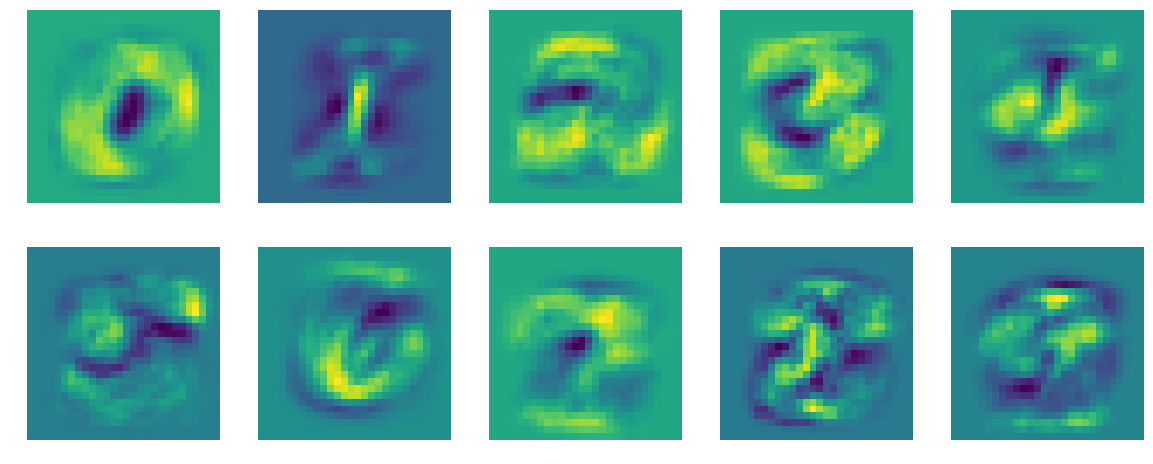

In [179]:

resetWeightsAndBias()

cross_entropy = tf.reduce_mean(
      tf.nn.softmax_cross_entropy_with_logits(labels=labels_y, logits=model_y))


# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

# This tensor will be used to display the weights as an image on screen.
reshapedWeights = tf.reshape(tf.transpose(tf.slice(weights_w, [0,0], [784,10])), [10,28,28])

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
matplotlib.rcParams['figure.figsize'] = (20.0, 8.0)

# Train
numRounds = 400  # Try adjusting the number of training rounds.
results = []
for i in range(numRounds):
    batch_xs, batch_ys = mnist.train.next_batch(60)    # Try adjusting the batch size.
    results = sess.run([train_step, reshapedWeights], feed_dict={samples_x: batch_xs, labels_y: batch_ys})
    
    # show some output with every Xth round
    x = 1
    if i % x == 0 and (i < 30):
        visualize(results[1])
        clear_output(True) if i + x < numRounds else 0
        plot.show()


clear_output(True)
visualize(results[1])
print('Training complete')



In [180]:
# How did the training go?  Let's check the accurracy
correct_prediction = tf.equal(tf.argmax(model_y, 1), tf.argmax(labels_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accurracy: ", sess.run(accuracy, feed_dict={samples_x: mnist.test.images,
                                  labels_y: mnist.test.labels}))


Accurracy:  0.9076


In [ ]:
# Let's take a look at the trained weights for the handwritten digit 8
trainedWeights = tf.transpose(tf.slice(weights_w, [0,8], [784,1])).eval().reshape(28,28)
show_image(plot, trainedWeights, cmap='viridis')

# The trained bias is displayed below the image of the weights
trainedBias = biases_b.eval()[8]
print(trainedBias)



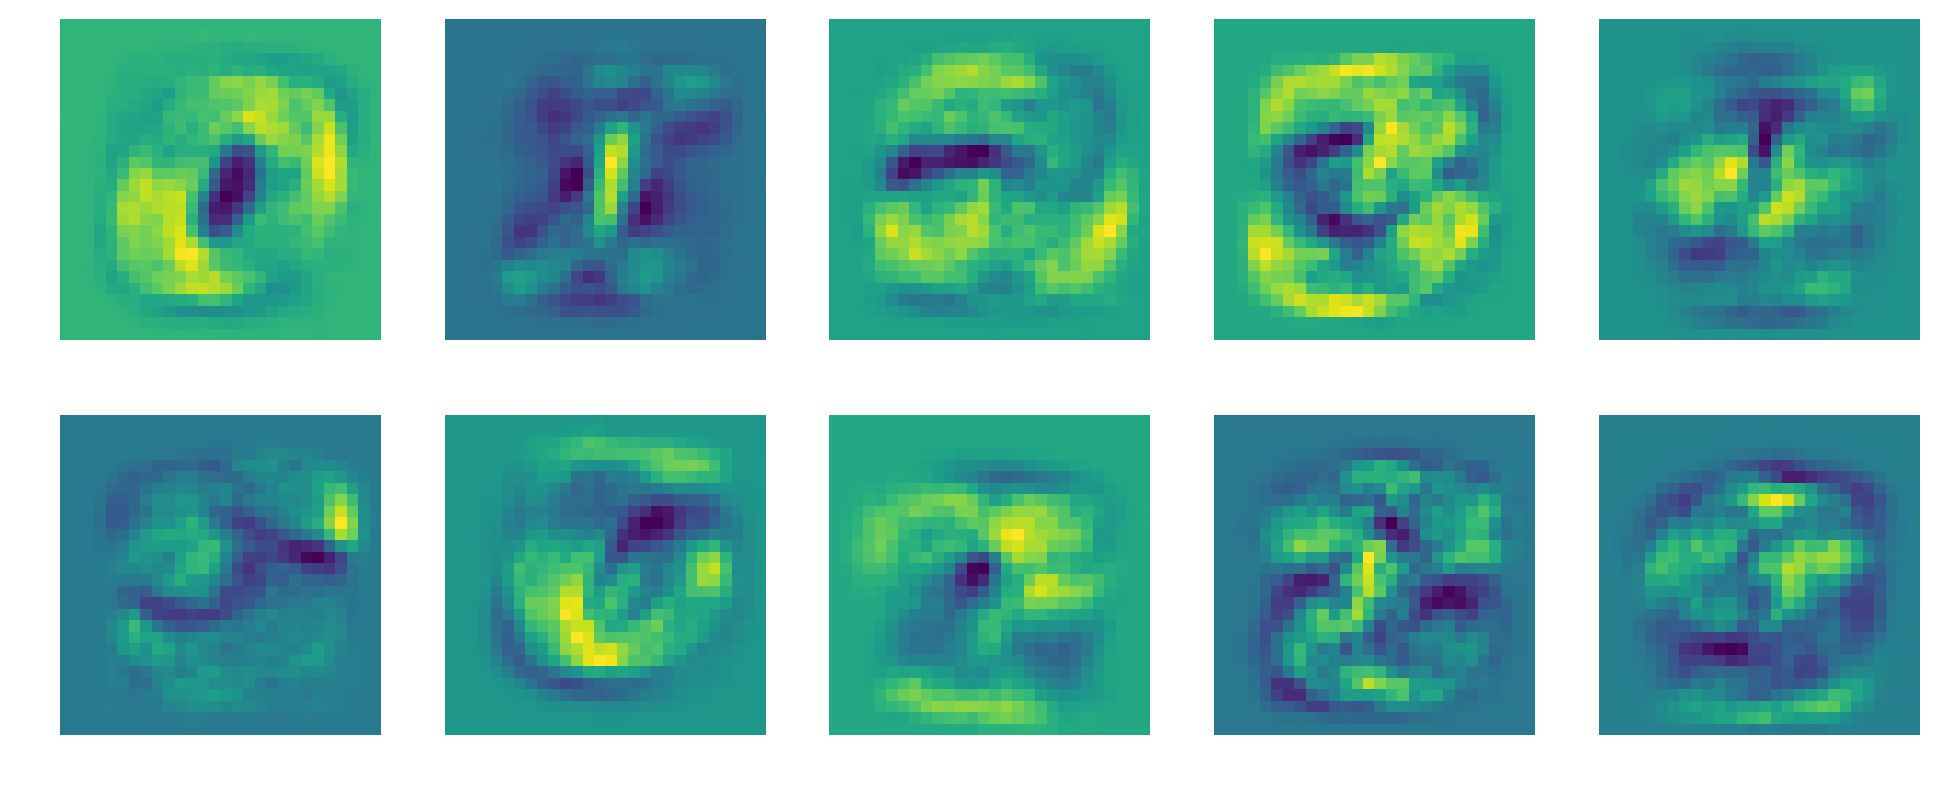

In [8]:
# Okay, now let's visualize all of the trained weights

plot.figure(figsize=(15, 6), dpi=160)
for i in range(10):
    plot.subplot(2,5,i+1)
    plot.axis('off')
    trainedWeights = tf.transpose(tf.slice(weights_w, [0,i], [784,1])).eval().reshape(28,28)
    plot.imshow(trainedWeights, cmap='viridis')



In [9]:
import numpy as np

mnist = input_data.read_data_sets('.',one_hot=True)  #reload
sample = mnist.train.images[5]
weights = tf.slice(weights_w, [0,0], [784,10]).eval().transpose()
costs = np.add(np.matmul(weights,sample), biases_b.eval())


Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz


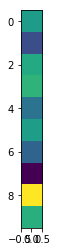

In [126]:
# Show the evidence gathered through the model for each possible digit 0-9
print(costs)
show_image(plot, sample)
show_image(plot, costs, size=(10,1))


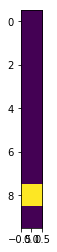

In [128]:
# Let's apply softmax to turn the evidence into a probability distribution
# In softmax, additional evidence multiplies the probability, resulting in a clear signal for the digit 8
softmax_costs = tf.nn.softmax(tf.constant(costs)).eval()
show_image(plot, softmax_costs, size=(10,1))